**1. Load an explore data**

In [2]:
import pandas as pd

# Cargar el dataset (ajusta la ruta si es necesario)
df = pd.read_csv(r'00_DATASET/ECONOMIC INFLATION INDICATORS.csv')

# Visualizar las primeras filas
print(df.head())


   Year  Consumer price index (2010 = 100)  Inflation consumer prices (%)  \
0  1976                           0.000102                       4.494012   
1  1977                           0.000110                       8.107256   
2  1978                           0.000122                      10.355672   
3  1979                           0.000146                      19.719717   
4  1980                           0.000215                      47.241650   

   Inflation  GDP deflator (%)  Lending interest rate (%)  \
0                     8.598921                        NaN   
1                    12.540618                        NaN   
2                    14.103811                        NaN   
3                    19.797174                        NaN   
4                    25.048944                        NaN   

   Real interest rate (%)  Total debt service  Total debt service (% of GNI)  \
0                     NaN           22.568226                       5.314133   
1         

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       48 non-null     int64  
 1   Consumer price index (2010 = 100)          48 non-null     float64
 2   Inflation consumer prices (%)              48 non-null     float64
 3   Inflation  GDP deflator (%)                48 non-null     float64
 4   Lending interest rate (%)                  37 non-null     float64
 5   Real interest rate (%)                     37 non-null     float64
 6   Total debt service                         47 non-null     float64
 7   Total debt service (% of GNI)              47 non-null     float64
 8   Current account balance (% of GDP)         48 non-null     float64
 9   Current account balance (US$)              48 non-null     float64
 10  Trade (% of GDP)            

**2. Data preprocessing**

In [4]:
# The missing values ​​were filled with the median of each column.
df.fillna(df.median(), inplace=True)


In [5]:
# Data normalization processing was performed.
from sklearn.preprocessing import StandardScaler

# The 'year' column was excluded since we will not use it in the clustering
X = df.drop(columns=['Year', 'Total debt service (% of GNI)', 'Trade (% of GDP)', 'Total Population'])

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
print(X_scaled)

[[-1.26044140e+00 -1.71736242e-01 -1.69595220e-01 -4.82637158e-01
  -3.45970762e-01 -2.72399065e-01  2.12589141e-02  4.10555166e-02
   5.05253556e-02]
 [-1.26044124e+00 -1.69587609e-01 -1.67364838e-01 -4.82637158e-01
  -3.45970762e-01 -1.25494597e-01 -2.75980405e-01 -3.00049392e-02
  -8.42816151e-02]
 [-1.26044102e+00 -1.68250576e-01 -1.66480317e-01 -4.82637158e-01
  -3.45970762e-01  1.72537029e+00 -1.18230754e+00 -2.65696140e-01
  -5.24280186e-01]
 [-1.26044056e+00 -1.62682200e-01 -1.63258769e-01 -4.82637158e-01
  -3.45970762e-01  4.73962210e-01 -1.17975089e+00 -3.37970362e-01
  -6.42581845e-01]
 [-1.26043925e+00 -1.46316144e-01 -1.60287092e-01 -4.82637158e-01
  -3.45970762e-01  5.61366707e-01  3.39480215e-01  9.30267506e-02
   1.54510488e-01]
 [-1.26043793e+00 -1.55300221e-01 -1.57776396e-01 -4.82637158e-01
  -3.45970762e-01  6.09885096e-01 -1.05537065e+00 -4.15921626e-01
  -7.45591813e-01]
 [-1.26043123e+00 -1.00947492e-01 -8.48977011e-02 -4.82637158e-01
  -3.45970762e-01  2.1321642

**3. Determination of the number of groups**

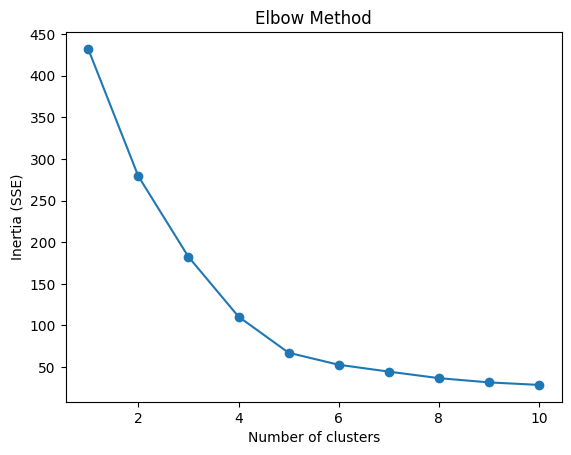

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Different numbers of clusters were tested
sse = []
k_range = range(1, 11)  
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_) 

# The Elbow curve were plot
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method')
plt.show()


**4. Clustering and Validation Algorithms for Subsequent Comparison.**

**a) K-Means Clustering Algorithm**

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# K-Means with 5 clusters were selected
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# The metrics validation were calculated
silhouette = silhouette_score(X_scaled, clusters)
ch_score = calinski_harabasz_score(X_scaled, clusters)
db_score = davies_bouldin_score(X_scaled, clusters)

print(f'Silhouette Score: {silhouette}')
print(f'Calinski-Harabasz Index: {ch_score}')
print(f'Davies-Bouldin Index: {db_score}')

Silhouette Score: 0.4771646192722237
Calinski-Harabasz Index: 58.26406529313848
Davies-Bouldin Index: 0.6243265453457238


**b) Agglomerative Clustering Algorithm**

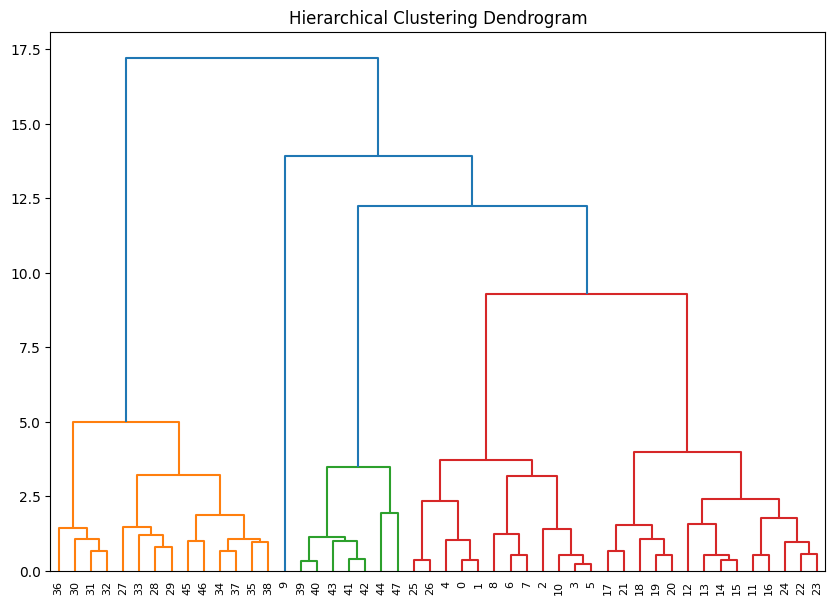

[2 2 2 2 2 2 2 2 2 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0 0 0 0 0 0 0 0 0
 0 0 4 4 4 4 4 0 0 0 4]


In [9]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

# Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.show()

# Agglomerative Clustering were applied
agg_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
clusters = agg_cluster.fit_predict(X_scaled)

# Print clusters
print(clusters)


In [10]:
# Metric validation for Agglomerative Clustering algorithm were calculated
silhouette = silhouette_score(X_scaled, clusters)
ch_score = calinski_harabasz_score(X_scaled, clusters)
db_score = davies_bouldin_score(X_scaled, clusters)

print(f'Silhouette Score: {silhouette}')
print(f'Calinski-Harabasz Index: {ch_score}')
print(f'Davies-Bouldin Index: {db_score}')

Silhouette Score: 0.4810361353947308
Calinski-Harabasz Index: 58.051126835123775
Davies-Bouldin Index: 0.6052563989809919


*After comparing both clustering methods, it can be inferred that the best results of the validation and adjustment methods for the present model are obtained from the agglomerative clustering method.*

**5. Visualize the Clusters**

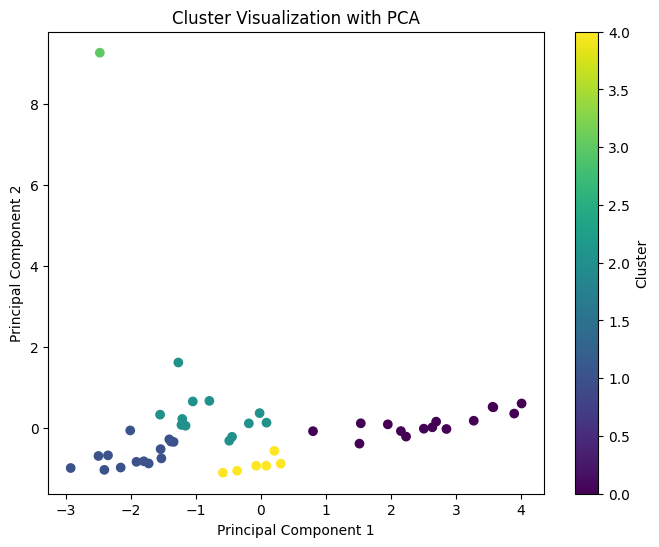

In [12]:
from sklearn.decomposition import PCA

# The data was reduced to 2 components using the PCA technique of dimension reduction, just to show the results.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


**6. Interpret the Results**

In [13]:
# The average values of the indicators were calculated for each cluster
cluster_summary = df.groupby('Cluster').median()
print(cluster_summary)


           Year  Consumer price index (2010 = 100)  \
Cluster                                              
0        2010.0                         100.000000   
1        1993.5                          40.428213   
2        1981.5                           0.000459   
3        1985.0                           3.903100   
4        2017.5                         144.020694   

         Inflation consumer prices (%)  Inflation  GDP deflator (%)  \
Cluster                                                               
0                             4.437381                     6.329992   
1                            11.126765                    11.503744   
2                            25.926659                    22.423059   
3                         11749.639630                 12338.660220   
4                             2.699823                     0.503275   

         Lending interest rate (%)  Real interest rate (%)  \
Cluster                                                      

**7. Add cluster labels to the original dataframe and export to CSV.**

In [15]:
df['Cluster'] = clusters
df[['Year', 'Cluster']].to_csv(r'D:\GAMIC\PORTFOLIO\MAPPING ECONOMIC SIMILARITIES\02_CLUSTERING RESULTS\Clustering_Results.csv', index=False)
print(df[['Year', 'Cluster']])

    Year  Cluster
0   1976        2
1   1977        2
2   1978        2
3   1979        2
4   1980        2
5   1981        2
6   1982        2
7   1983        2
8   1984        2
9   1985        3
10  1986        2
11  1987        1
12  1988        1
13  1989        1
14  1990        1
15  1991        1
16  1992        1
17  1993        1
18  1994        1
19  1995        1
20  1996        1
21  1997        1
22  1998        1
23  1999        1
24  2000        1
25  2001        2
26  2002        2
27  2003        0
28  2004        0
29  2005        0
30  2006        0
31  2007        0
32  2008        0
33  2009        0
34  2010        0
35  2011        0
36  2012        0
37  2013        0
38  2014        0
39  2015        4
40  2016        4
41  2017        4
42  2018        4
43  2019        4
44  2020        0
45  2021        0
46  2022        0
47  2023        4
